In [1]:
import numpy as np
import pandas as pd
import requests
import json

url = "https://data.cityofnewyork.us/resource/erm2-nwe9?complaint_type=Graffiti&$limit=50000"
# complaint_type=Graffiti"
r = requests.get(url)
jsonobject = r.json()
df = pd.DataFrame.from_records(jsonobject)


df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_address,street_name,address_type,facility_type,...,city,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location,intersection_street_1,intersection_street_2,landmark
0,29139877,2014-10-24T13:50:06.000,DSNY,Department of Sanitation,Graffiti,Graffiti,439 e20 st,e20 st,ADDRESS,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29142818,2014-10-24T13:50:07.000,DSNY,Department of Sanitation,Graffiti,Graffiti,651 e20 st,e20 st,ADDRESS,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29143808,2014-10-24T17:32:18.000,DSNY,Department of Sanitation,Graffiti,Graffiti,3 ave 10 street transit mta wall psny,ave 10 street transit mta wall psny,ADDRESS,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29176117,2014-10-29T10:22:34.000,DSNY,Department of Sanitation,Graffiti,Graffiti,26 26 AVE,26 AVE,ADDRESS,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29177012,2014-10-29T18:50:08.000,DSNY,Department of Sanitation,Graffiti,Graffiti,1139 mcdoinald av,mcdoinald av,ADDRESS,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(50000, 34)

In [3]:
df['agency_name'].value_counts()

Department of Sanitation           46446
New York City Police Department     3553
New York Police Precinct               1
Name: agency_name, dtype: int64

In [4]:
df['year'] = df['created_date'].str.extract('(\d\d\d\d)').astype(int)
df.head(2)

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_address,street_name,address_type,facility_type,...,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,location,intersection_street_1,intersection_street_2,landmark,year
0,29139877,2014-10-24T13:50:06.000,DSNY,Department of Sanitation,Graffiti,Graffiti,439 e20 st,e20 st,ADDRESS,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
1,29142818,2014-10-24T13:50:07.000,DSNY,Department of Sanitation,Graffiti,Graffiti,651 e20 st,e20 st,ADDRESS,N/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


<AxesSubplot:>

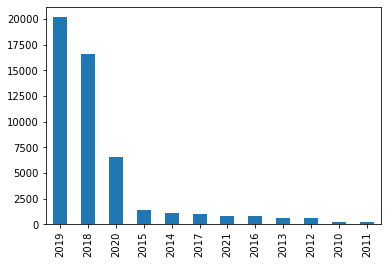

In [5]:
df.year.value_counts().plot(kind='bar')

In [6]:
# .plot(kind='barh')
df.borough.value_counts()

BROOKLYN         23180
MANHATTAN         9864
BRONX             8139
QUEENS            7670
STATEN ISLAND     1133
Unspecified         14
Name: borough, dtype: int64

In [7]:
df.borough.value_counts().sum()

50000

In [8]:
y2020 = df[df['year']==2020]
y2020.borough.value_counts()

BROOKLYN         3107
MANHATTAN        1529
QUEENS            836
BRONX             576
STATEN ISLAND     466
Unspecified         3
Name: borough, dtype: int64

In [9]:
y2019 = df[df['year']==2019]
y2019.borough.value_counts()

BROOKLYN         9362
MANHATTAN        4505
BRONX            3350
QUEENS           2634
STATEN ISLAND     307
Unspecified        10
Name: borough, dtype: int64

In [107]:
brooklyn_2019 = df[(df['year']==2019) & (df['borough']=='BROOKLYN')]
brooklyn_2019

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,park_borough,latitude,longitude,location,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,landmark,year
0,42989617,2019-06-16T15:01:26.000,2019-10-04T00:00:00.000,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11206,926 BROADWAY,...,BROOKLYN,40.6974314659344,-73.93607088254036,"{'latitude': '40.6974314659344', 'longitude': '-73.93607088254036', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2019
6,43009042,2019-06-18T15:01:21.000,2019-12-10T00:00:00.000,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11221,1189 BROADWAY,...,BROOKLYN,40.692469183277424,-73.9272624645795,"{'latitude': '40.692469183277424', 'longitude': '-73.9272624645795', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2019
11,43017355,2019-06-19T10:02:26.000,2019-12-05T00:00:00.000,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,11249,178 BEDFORD AVENUE,...,BROOKLYN,40.71796949807417,-73.95759472509405,"{'latitude': '40.71796949807417', 'longitude': '-73.95759472509405', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2019
17,43029265,2019-06-20T08:37:20.000,2019-10-04T00:00:00.000,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11205,284 WILLOUGHBY AVENUE,...,BROOKLYN,40.69253726885699,-73.95971322637483,"{'latitude': '40.69253726885699', 'longitude': '-73.95971322637483', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2019
20,43031206,2019-06-20T09:19:03.000,2019-10-18T00:00:00.000,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11216,369 NOSTRAND AVENUE,...,BROOKLYN,40.68535612516557,-73.95055918728815,"{'latitude': '40.68535612516557', 'longitude': '-73.95055918728815', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18009,41351096,2019-01-05T16:13:32.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,254 8 Street,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
18141,41882927,2019-03-05T10:57:59.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,302kingshwy 302kingshwy,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
18149,41392013,2019-01-10T12:38:54.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,44 ESTATE ROAD,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
48807,43753693,2019-09-09T09:12:35.000,2020-01-02T00:00:00.000,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,NaN,589 KNICKERBOCK AVENUE,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [103]:
brooklyn_2021.shape

(19, 35)

In [89]:
brooklyn_2021.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'facility_type', 'status', 'due_date', 'resolution_description',
       'resolution_action_updated_date', 'community_board', 'bbl', 'borough',
       'x_coordinate_state_plane', 'y_coordinate_state_plane',
       'open_data_channel_type', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'landmark', 'year'],
      dtype='object')

In [90]:
brooklyn_2021.to_csv('brooklyn_2021.csv')

In [108]:
brooklyn_2020 = df[(df['year']==2020) & (df['borough']=='BROOKLYN')]
brooklyn_2020

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,park_borough,latitude,longitude,location,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,landmark,year
37,45745758,2020-03-03T06:41:49.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11216,1219 ATLANTIC AVENUE,...,BROOKLYN,40.678507890835554,-73.95049936906851,"{'latitude': '40.678507890835554', 'longitude': '-73.95049936906851', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2020
70,45901185,2020-03-26T13:27:54.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,2468/ 86 ST,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
472,46005312,2020-04-15T10:43:57.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11206,100 MANHATTAN AVENUE,...,BROOKLYN,40.70584589650492,-73.94469381154327,"{'latitude': '40.70584589650492', 'longitude': '-73.94469381154327', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2020
924,46124832,2020-05-04T14:32:21.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11230,1679 EAST 3 STREET,...,BROOKLYN,40.60968391930369,-73.97100373592826,"{'latitude': '40.60968391930369', 'longitude': '-73.97100373592826', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2020
1083,45285101,2020-01-01T09:23:42.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11214,7517 NEW UTRECHT AVENUE,...,BROOKLYN,40.61555869096264,-73.99999639811011,"{'latitude': '40.61555869096264', 'longitude': '-73.99999639811011', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18150,45493318,2020-01-28T16:03:29.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11206,186 SCHOLES STREET,...,BROOKLYN,40.708937785491614,-73.9417335584355,"{'latitude': '40.708937785491614', 'longitude': '-73.9417335584355', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2020
18164,45489322,2020-01-28T13:39:23.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Residential,11221,265 EVERGREEN AVENUE,...,BROOKLYN,40.69552615150693,-73.92615562886313,"{'latitude': '40.69552615150693', 'longitude': '-73.92615562886313', 'human_address': '{""address"": """", ""city"": """", ""state"": """", ""zip"": """"}'}",NaN,NaN,NaN,NaN,NaN,2020
18166,45492559,2020-01-28T11:03:36.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,8324 84 street,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
18226,45489327,2020-01-28T11:13:02.000,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,NaN,8514/ Bay Parkway,...,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [92]:
brooklyn_2020.to_csv('brooklyn_2020.csv')

In [93]:
#2019

brooklyn_2019 = df[(df['year']==2019) & (df['borough']=='BROOKLYN')]

In [94]:
brooklyn_2019.to_csv('brooklyn_2019.csv')

In [95]:
df2 = pd.read_csv('311ServiceRequests_2020.csv')
df2.head()

/opt/anaconda3/envs/columbia/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,18,20,31,32,33,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,45462429,01/25/2020 12:49:39 AM,01/25/2020 10:13:00 AM,TLC,Taxi and Limousine Commission,Lost Property,Bag/Wallet,NaN,10036.0,WEST 44 STREET,...,NaN,NaN,"WEST 44 STREET BETWEEN 6 AVENUE AND BROADWAY, MANHATTAN, N",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45462615,01/24/2020 08:45:14 PM,01/24/2020 08:45:16 PM,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,11357.0,162-12 12 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.790262,-73.799776,"(40.79026193589992, -73.79977622082558)"
2,45466142,01/24/2020 07:26:18 AM,01/24/2020 07:26:18 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467.0,3165 DECATUR AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.872835,-73.876487,"(40.87283464140425, -73.87648695594841)"
3,45467606,01/24/2020 10:26:00 AM,01/25/2020 12:00:00 AM,DEP,Department of Environmental Protection,Lead,Lead Kit Request (Residential) (L10),NaN,11217.0,300 ASHLAND PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686273,-73.978113,"(40.68627318421986, -73.97811334249946)"
4,45481372,01/27/2020 07:10:37 AM,01/27/2020 07:10:40 AM,EDC,Economic Development Corporation,Noise - Helicopter,Other,Above Address,11215.0,199 14 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.666965,-73.990448,"(40.666965381676256, -73.99044763544703)"


In [96]:
graffiti = df2[df2['Complaint Type'].str.contains('Graffiti')]
graffiti

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
17,45287976,01/01/2020 04:57:47 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11204.0,6609 18 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.618402,-73.990908,"(40.61840193667543, -73.99090844267874)"
27,45293344,01/02/2020 08:41:06 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10474.0,1380 SPOFFORD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.815032,-73.882935,"(40.81503229406327, -73.88293450110314)"
28,45293345,01/02/2020 08:35:15 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,10455.0,2792 THIRD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.815176,-73.919256,"(40.81517598505509, -73.91925629116382)"
31,45293347,01/02/2020 06:06:31 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11220.0,5702 3 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.643647,-74.018731,"(40.64364733648157, -74.01873050529493)"
41,45285130,01/01/2020 09:15:11 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11219.0,5415 NEW UTRECHT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631805,-73.995403,"(40.63180501560896, -73.9954028696561)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590213,48537485,12/31/2020 02:03:22 PM,12/31/2020 03:12:50 PM,NYPD,New York City Police Department,Graffiti,Police Report Not Requested,Street/Sidewalk,10025.0,280 RIVERSIDE DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.798502,-73.972709,"(40.79850212652865, -73.97270932568053)"
2590282,48538027,12/31/2020 12:10:44 PM,12/31/2020 12:24:33 PM,NYPD,New York City Police Department,Graffiti,Police Report Requested,Residential Building/House,10005.0,82 BEAVER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.705359,-74.008602,"(40.705359314572945, -74.00860207956921)"
2590796,48541212,12/31/2020 09:48:31 AM,12/31/2020 10:00:29 AM,NYPD,New York City Police Department,Graffiti,Police Report Requested,NaN,11218.0,1358 38 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640431,-73.984470,"(40.64043092476985, -73.98447006803504)"
2590883,48541889,12/31/2020 10:21:12 AM,12/31/2020 11:12:29 AM,NYPD,New York City Police Department,Graffiti,Police Report Not Requested,Store/Commercial,11222.0,232 JAVA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.731954,-73.950828,"(40.731954091967815, -73.95082770088665)"


In [97]:
graffiti.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [98]:
graffiti = graffiti.drop(columns=['X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment'])
graffiti.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [99]:
graffiti['Borough'].value_counts()

BROOKLYN         3282
MANHATTAN        1646
QUEENS            886
BRONX             624
STATEN ISLAND     474
Unspecified         3
Name: Borough, dtype: int64

In [100]:
brooklyn_graffiti = graffiti[graffiti['Borough']=='BROOKLYN']
pd.set_option('display.max_colwidth', 400)
brooklyn_graffiti

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,Latitude,Longitude,Location
17,45287976,01/01/2020 04:57:47 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11204.0,6609 18 AVENUE,...,Open,02/29/2020 03:53:21 PM,The graffiti on this property has been scheduled to be removed by the City.,01/30/2020 03:53:21 PM,11 BROOKLYN,3.055610e+09,BROOKLYN,40.618402,-73.990908,"(40.61840193667543, -73.99090844267874)"
31,45293347,01/02/2020 06:06:31 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11220.0,5702 3 AVENUE,...,Open,02/29/2020 03:53:21 PM,The graffiti on this property has been scheduled to be removed by the City.,01/30/2020 03:53:21 PM,07 BROOKLYN,3.008450e+09,BROOKLYN,40.643647,-74.018731,"(40.64364733648157, -74.01873050529493)"
41,45285130,01/01/2020 09:15:11 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11219.0,5415 NEW UTRECHT AVENUE,...,Open,02/29/2020 03:53:21 PM,The graffiti on this property has been scheduled to be removed by the City.,01/30/2020 03:53:21 PM,12 BROOKLYN,3.056770e+09,BROOKLYN,40.631805,-73.995403,"(40.63180501560896, -73.9954028696561)"
90,45285100,01/01/2020 09:08:20 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11220.0,5410 5 AVENUE,...,Open,04/13/2020 04:00:00 AM,The graffiti on this property has been scheduled to be removed by the City.,03/14/2020 04:00:01 AM,07 BROOKLYN,3.008230e+09,BROOKLYN,40.642748,-74.012785,"(40.64274786170989, -74.01278471271169)"
91,45285101,01/01/2020 09:23:42 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,11214.0,7517 NEW UTRECHT AVENUE,...,Open,02/29/2020 03:53:21 PM,The graffiti on this property has been scheduled to be removed by the City.,01/30/2020 03:53:21 PM,11 BROOKLYN,3.062250e+09,BROOKLYN,40.615559,-73.999996,"(40.61555869096264, -73.99999639811011)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553736,48427309,12/16/2020 09:04:29 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Comercial,11215.0,140 18 STREET,...,Open,01/15/2021 09:04:29 AM,The graffiti on this property has been scheduled to be removed by the City.,12/16/2020 09:04:29 AM,07 BROOKLYN,3.006330e+09,BROOKLYN,40.664973,-73.994900,"(40.664972956492875, -73.99489955015797)"
2554541,48474255,12/22/2020 03:49:56 PM,12/22/2020 04:15:43 PM,NYPD,New York City Police Department,Graffiti,Police Report Requested,Store/Commercial,11236.0,ROCKAWAY PARKWAY,...,Closed,NaN,The Police Department responded to the complaint and took action to fix the condition.,12/22/2020 09:15:47 PM,18 BROOKLYN,NaN,BROOKLYN,40.633803,-73.889694,"(40.63380255460564, -73.88969436313862)"
2587013,48535003,12/30/2020 11:42:25 AM,12/30/2020 12:16:14 PM,NYPD,New York City Police Department,Graffiti,Police Report Not Requested,Store/Commercial,11218.0,302 CHURCH AVENUE,...,Closed,NaN,The Police Department responded to the complaint and took action to fix the condition.,12/30/2020 05:16:18 PM,12 BROOKLYN,3.053360e+09,BROOKLYN,40.643688,-73.977306,"(40.643687794347564, -73.97730573407173)"
2590796,48541212,12/31/2020 09:48:31 AM,12/31/2020 10:00:29 AM,NYPD,New York City Police Department,Graffiti,Police Report Requested,NaN,11218.0,1358 38 STREET,...,Closed,NaN,The Police Department responded to the complaint and took action to fix the condition.,12/31/2020 03:00:31 PM,12 BROOKLYN,3.052990e+09,BROOKLYN,40.640431,-73.984470,"(40.64043092476985, -73.98447006803504)"


In [101]:
brooklyn_graffiti['Resolution Description'].value_counts()

The graffiti on this property has been scheduled to be removed by the City.                                                                                                                                          2079
The graffiti has been reported. The property owner will be notified that the City will remove the graffiti after 35 days unless the property owner requests to keep the graffiti or remove it himself or herself.     251
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                                                 194
The Police Department responded to the complaint and took action to fix the condition.                                                                                                                                166
The Police Department responded to the complaint and with the information available observed no evidence of the violation at tha